**Instituto de Informática - UFG**

Disciplina: Inteligência Artificial

Prof. Cedric Luiz de Carvalho

---

Aluna(o): Arthur Gomes de Siqueira - Engenheiro de conhecimento

Aluna(o): Ricardo Ataide de Oliveira Junior - Analista de dados

---

Grupo (D)

---

Papel no grupo: 

---

#Especificação do problema : Incerteza

As doenças cardiovasculares são a maior causa de morte no planeta. Milhões de pessoas morrem anualmente por problemas cardíacos.  O assunto tem sido objeto de pesquisa tanto na academia quanto na indústria. Por exemplo, [Saheki e outros](http://sites.poli.usp.br/p/fabio.cozman/Publications/Article/saheki-sharovsky-cozman-coupe-enia2003.pdf) desenvolveram uma rede bayesiana para tratar do assunto.

A partir do estudo de trabalhos já desenvolvidos e da [base de dados](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data) disponibilizada, construa uma rede bayesiana que permita fazer predições de óbitos por essas doenças.



## O trabalho

O trabalho deve ser feito em grupos, conforme definido. Cada grupo deverá entregar apenas um produto final para ser avaliado pelo professor. Apesar do trabalho ser feito em grupos, a avaliação de cada aluno será feita individualmente. 

**Observação:** antes de começar  a resolver o problema, o grupo deve tentar identificar trabalhos feitos por outros autores que resolveram problemas semelhantes/correlatos, usando a técnica em estudo. Isso irá permitir uma análise mais fundamentada dos resultados produzidos pelo grupo.

## Divisão de papéis:

* **Analista de dados:** deverá ficar responsável por fazer uma "Análise Exploratória de Dados" (AED), analisando a base de dados fornecida e preparando-a para ser usada na solução do problema. Esta análise deve produzir diversos gráficos que pemitam uma visão geral do comportamento dos dados.

* **Engenheiro de conhecimento:** deverá produzir a solução para o problema, utilizando a técnica estudada, o modelo proposto pelo grupo e a base de dados preparada pelo analista de dados.

### Primeira etapa:

(1) **Notebook descrevendo detalhadamente o modelo:**
* Um modelo é uma representação abstrata do mundo. No nosso caso, o "mundo" é o contexto onde o problema se insere. Desta forma, deve ser analisado com cuidado o que deve e o que não deve ser considerado. Por exemplo, se a base de dados tem 30 colunas, todas elas deverão ser utilizadas na implementação? Algumas poderão ser desconsideradas? Por quê?
* Para utilizar a técnica em estudo, é preciso conhecê-la muito bem. Assim, nesta etapa, **deve ser feita uma descrição detalhada do problema e da técnica a ser utilizada.**
* Deve ser elaborado um modelo com base na técnica em estudo.
* O notebook, descrevendo o problema, a técnica em questão e o modelo elaborado deverá ser submetido na Plataforma Turing, até dia 08/09/2021. Os modelos serão discutidos com a turma no dia 09/09/2021.

### Segunda etapa:

(2) **Notebook contendo a Análise Exploratória dos Dados**

(3) **Notebook contendo a solução para o problema** 

(4) **Um vídeo explicando detalhadamente como a técnica estudada foi utilizada para resolver o problema proposto** . O vídeo NÃO deve ser uma apresentação do notebook nem deve apresentar detalhes de codificação. Deve trazer uma descrição do problema, do modelo utilizado e da solução desenvolvida, de preferência utilizando slides ou algo parecido. Preferencialmente, o grupo deve enviar um *link* para o


**Observação:** poderão ser utilizados códigos desenvolvidos pelo grupo e/ou códigos de terceiros. No caso de se usar códigos desenvolvidos por terceiros, o autor desses códigos deve ser devidamente referenciado e os códigos devem ser devidamente documentados (comentários no próprio código e fora dele).

Os produtos da segunda etapa deverão ser submetidos na Plataforma Turing até 14/09/2021.
 


## Video 

Link: https://drive.google.com/file/d/1Hjyir9bcPpfalIxKtgbMO4t47I2gRoUT/view?usp=sharing

# O Problema:
Devido ao grande número de óbitos anuais por conta de doenças cardiovasculares, será realizado um estudo buscando apontar a probabilidade de óbito por conta de doenças do genero, a partir de variáveis presentes em diversos pacientes, conforme disponibilizado pela base de dados utilizada.

# O Modelo:
Após uma breve ánalise dos dados, foram definidas como fatores com potêncial de influenciar em óbitos os seguintes:

### Nivel de Creatina Sérica

* Seria a quantidade de Creatina Sérica no corpo da pessoa

### Idade

* Pessoas idosas
* Pessoas adultas
* Pessoas jovens

### Doenças como:

* Anemia
* Diabetes
* Hipertensão
* Fração de ejeção 
* Tabagismo

### Morte

* Pessoas que morreram
* Pessoas que não morreram

Conforme apontado no diagrama abaixo, é definida uma pequena rede bayesiana, quem de maneira simples trata-se de uma técnica que mapeia as dependencias entre fatores para um dado evento da realidade, desta maneira, cada 'seta' que aponta para um item, indica que o item apontado é dependente do item de origem da seta. 

A partir desta 'rede', é possível visualizar graficamente a correlação entre fatores da realidade, neste caso, doenças com óbitos por falência cardiáca, e, calcular de maneira mais assertiva as probabilidades de uma pessoa que possua algumas destas condições vir a óbito.



In [ ]:
#Fazendo upload dos arquivos
from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


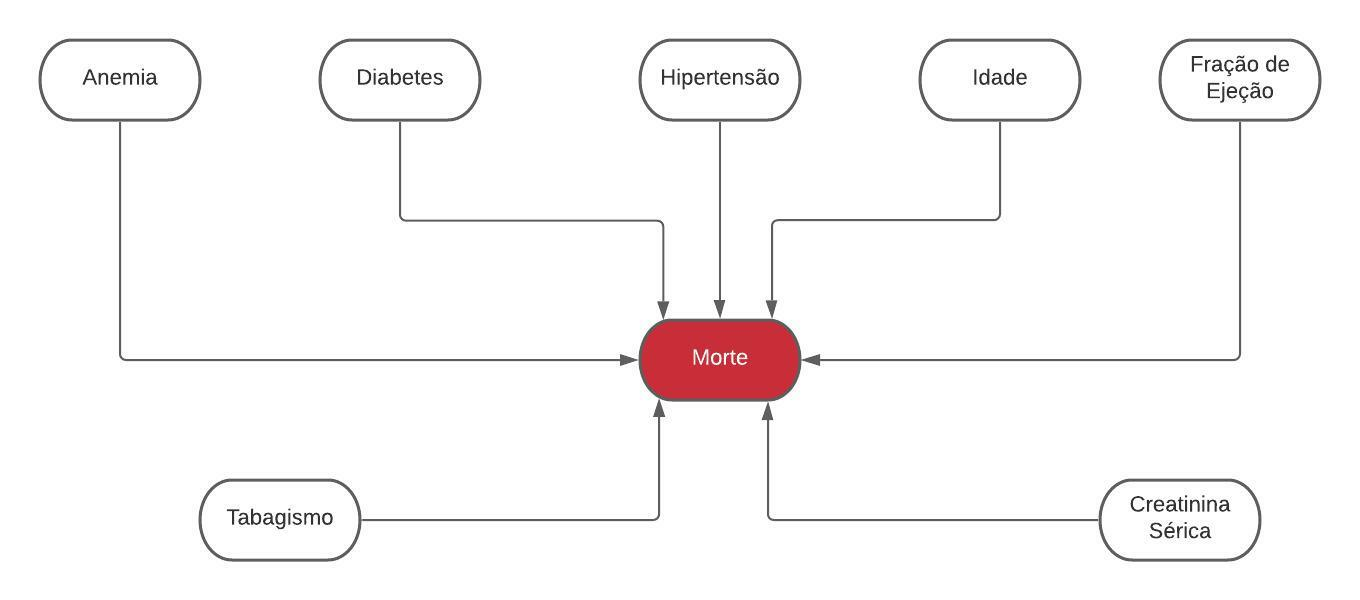

In [ ]:
from IPython.display import Image
Image("Modelo.jpeg")

### Segunda etapa:

##**Notebook contendo a Análise Exploratória dos Dados**


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
#Verificando se há algum valor faltante "NaN" na base de dados
for coluna in df.columns.values:
  print(coluna,":",len(df[df[coluna].isna()]))

age : 0
anaemia : 0
creatinine_phosphokinase : 0
diabetes : 0
ejection_fraction : 0
high_blood_pressure : 0
platelets : 0
serum_creatinine : 0
serum_sodium : 0
sex : 0
smoking : 0
time : 0
DEATH_EVENT : 0


### O que pode ser analisado?
 * Quantos mortos possuiam alguma doença? Quantos possuiam nenhuma
 * Dos mortos que possuíam alguma doença, qual o quantitativo para cada doença
  * Relação entre mortos e cada doença
  * Talvez relação entre 'vivos' e cada doença
 * Relação entre idade e mortos
 * Relação entre sexo e mortos



In [ ]:
#Considerando 0 envento de morte falso, e e 1 envento de morte true:
print('Quantidade de Death Event falso: {}'.format(len(df[df.DEATH_EVENT == 0])))
print('Quantidade de Death Event verdadeiro: {}'.format(len(df[df.DEATH_EVENT == 1])))

Quantidade de Death Event falso: 203
Quantidade de Death Event verdadeiro: 96


In [ ]:
df.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
#Quantidade de DEATH_EVENT == 1 por condições que variam entre true e false
print("Anemia:{}".format(len(df[(df.anaemia==1) & (df.DEATH_EVENT==1)])))
print("diabetes:{}".format(len(df[(df.diabetes==1) & (df.DEATH_EVENT==1)])))
print("high_blood_pressure:{}".format(len(df[(df.high_blood_pressure==1) & (df.DEATH_EVENT==1)])))
print("sex 0: {}".format(len(df[(df.sex==0) & (df.DEATH_EVENT==1)])))
print("sex 1:{}".format(len(df[(df.sex==1) & (df.DEATH_EVENT==1)])))


Anemia:46
diabetes:40
high_blood_pressure:39
sex 0: 34
sex 1:62


In [ ]:
#Quantidade de DEATH_EVENT == 0 por condições que variam entre true e false
print("Anaemia:{}".format(len(df[(df.anaemia==1) & (df.DEATH_EVENT==0)])))
print("diabetes:{}".format(len(df[(df.diabetes==1) & (df.DEATH_EVENT==0)])))
print("high_blood_pressure:{}".format(len(df[(df.high_blood_pressure==1) & (df.DEATH_EVENT==0)])))
print("sex 0: {}".format(len(df[(df.sex==0) & (df.DEATH_EVENT==0)])))
print("sex 1:{}".format(len(df[(df.sex==1) & (df.DEATH_EVENT==0)])))


Anaemia:83
diabetes:85
high_blood_pressure:66
sex 0: 71
sex 1:132


In [ ]:
fig = px.histogram(df, x = df.age, color_discrete_sequence = ["#FF4C4C"], labels = {'count': 'Quantidade'})
fig.update_layout(title = 'Distribuição de idades na base de dados', plot_bgcolor = "#EFEFEF")
fig.update_xaxes(showgrid = False,showline=True, linewidth=2, linecolor='grey',
                 dtick='4', showticklabels=True, ticks='outside')
fig.update_yaxes(showgrid = True,showline=True, linewidth=2, linecolor='grey', ticks='outside')

fig.show()

In [ ]:
df[df.DEATH_EVENT == 1].age.mean()
df_death = df[df.DEATH_EVENT == 1].reset_index()
fig = px.histogram(df_death, color_discrete_sequence = ["#FF4C4C"],x = df_death.age, labels = {'count': 'Quantidade'})
fig.update_layout(title = 'Relação da quantidade de óbitos por idade', plot_bgcolor = "#EFEFEF")
fig.update_xaxes(showgrid = False,showline=True, linewidth=2, linecolor='grey',
                 dtick='4', showticklabels=True, ticks='outside')
fig.update_yaxes(showgrid = True,showline=True, linewidth=2, linecolor='grey', ticks='outside')

fig.show()

In [ ]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df_grupos = df.groupby(["age","DEATH_EVENT"],as_index=True).agg({
    "age" : "count",
    }).rename(columns = {"age":"Ocorrencias"}).reset_index()
a = {'1':2}

df_grupos.DEATH_EVENT = df_grupos.DEATH_EVENT.replace({0: "False", 1: "True"})
fig = px.bar(df_grupos, x="age", y="Ocorrencias", color='DEATH_EVENT', height=400)
fig.update_layout(title = 'Compararndo o DEAHT_EVENT para cada idade', plot_bgcolor = "#EFEFEF")
fig.update_xaxes(showgrid = False,showline=True, linewidth=2, linecolor='grey',
                 dtick='4', showticklabels=True, ticks='outside')
fig.update_yaxes(showgrid = True,showline=True, linewidth=2, linecolor='grey', ticks='outside')
fig.update_layout(barmode='group')
fig.show()



In [ ]:
# grafico_dispersao(df_grupos,'age',1,'Evento de Morte por idade')
fig = px.scatter(df_grupos,y='Ocorrencias', x='age', color='DEATH_EVENT')
fig.update_xaxes(showgrid = False,showline=True, linewidth=2, linecolor='grey',
                dtick=1, showticklabels=True, ticks='outside')
fig.update_yaxes(showgrid = True,showline=True, linewidth=2, linecolor='grey', ticks='outside')
fig.update_layout(title = 'Dispersão de mortos por idade', plot_bgcolor = "#EFEFEF")
fig.show()

## Analisando as comorbidades

In [ ]:
#Percentual dos mortos que possuiam alguma comorbidade
df_comorbidade = df.groupby(["anaemia", "diabetes", "high_blood_pressure",'smoking','DEATH_EVENT']).agg({"anaemia": "count"})
df_comorbidade = df_comorbidade.rename(columns={"anaemia": "Ocorrencias"}).reset_index()
df_algumaComorbidade = df_comorbidade[((df_comorbidade.anaemia == 1) | (df_comorbidade.high_blood_pressure ==1) | (df_comorbidade.diabetes == 1)) & df_comorbidade.DEATH_EVENT == 1]
values = [df_algumaComorbidade.Ocorrencias.sum(), len(df[df.DEATH_EVENT==1]) - df_algumaComorbidade.Ocorrencias.sum()]
specs = [[{'type':'domain'}]]
fig = make_subplots(rows = 1, cols=1, specs = specs,
                    subplot_titles = ['Relação de mortes para pacientes que possuiam alguma comorbidade' ]
                    )
fig.add_trace(go.Pie(labels = ['Total de Mortes de quem possuía alguma comorbidade','Total de pessoas que morreram e não possuíam comorbidade'],values=values, name='Total de Pessoas com Alguma Comorbidade'), 1, 1)
fig.show()

In [ ]:
#Death Event para as "comorbidades que variam entre sim e nao"
#Organizando os dados para facilitar a geração do gráfico

mortes=[df_comorbidade[(df_comorbidade.anaemia==1) & (df_comorbidade.DEATH_EVENT == 1)].Ocorrencias.sum(),
        df_comorbidade[(df_comorbidade.diabetes==1) & (df_comorbidade.DEATH_EVENT == 1)].Ocorrencias.sum(),
        df_comorbidade[(df_comorbidade.high_blood_pressure==1) & (df_comorbidade.DEATH_EVENT == 1)].Ocorrencias.sum(),
        df_comorbidade[(df_comorbidade.smoking==1) & (df_comorbidade.DEATH_EVENT == 1)].Ocorrencias.sum()]

mortes_gerais = df_comorbidade[(df_comorbidade.DEATH_EVENT == 1)].Ocorrencias.sum()

valores_totais = [df_comorbidade[(df_comorbidade.anaemia==1)].Ocorrencias.sum(),
                  df_comorbidade[(df_comorbidade.diabetes==1)].Ocorrencias.sum(),
                  df_comorbidade[(df_comorbidade.high_blood_pressure==1)].Ocorrencias.sum(),
                  df_comorbidade[(df_comorbidade.smoking==1)].Ocorrencias.sum()]

valores_x = ['Anemia Mortes','Anemia Valores_totais' , 
             'Diabetes Mortes','Diabetes Valores_totais', 
             'Pressao Alta Mortes', 'Pressao Alta Valores_totais',
             'Fumantes Mortes', 'Fumantes Valores_totais'] 
valores_y = [mortes[0],valores_totais[0],
             mortes[1],valores_totais[1],
             mortes[2],valores_totais[2],
             mortes[3],valores_totais[3]]

fig = px.bar(x = valores_x, y = valores_y, color = valores_x, labels={
    'y':'Quantidade de Ocorrências','x':'Comorbidade'
})
#Formatando o grafico
fig.update_layout(title = 'Comparando o DEATH_EVENT para cada comorbidade', plot_bgcolor = "#EFEFEF")
fig.update_xaxes(showgrid = False,showline=True, linewidth=2, linecolor='grey',
                   showticklabels=True, ticks='outside')
fig.update_yaxes(showgrid = True,showline=True, linewidth=2, linecolor='grey', ticks='outside')


In [ ]:
#Gerando/organizando os dados para melhor facilitar a geração do gráfico
values_anemia = [mortes[0],valores_totais[0] - mortes[0]]
values_diabetes =[mortes[1],valores_totais[1] - mortes[1]] 
values_pressao =[mortes[2],valores_totais[2] - mortes[2]]
values_fumantes =[mortes[3],valores_totais[3] - mortes[3]]

#iniciando a geração do gráfico
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'},{'type':'domain'}]]
fig = make_subplots(rows = 1, cols=4, specs = specs,
                    subplot_titles = ['Anemia','Diabetes','Pressão Alta','Fumantes'],
                    )
#Gerando 4 gráficos de 'pizza' um para cada comorbidade
fig.add_trace(go.Pie(labels = ['Total de Mortes','Total de pessoas com anemia'],values=values_anemia, name='Total de Pessoas com Anemia'), 1, 1)
fig.add_trace(go.Pie(labels = ['Total de Mortes','Total de pessoas com diabetes'],values=values_diabetes, name = 'Total de Pessoas com diabetes'), 1, 2)
fig.add_trace(go.Pie(labels = ['Total de Mortes','Total de pessoas com pressão alta'],values=values_pressao, name = 'Total de Pessoas com Pressão alta'), 1, 3)
fig.add_trace(go.Pie(labels = ['Total de Mortes','Total de pessoas Fumantes'],values=values_fumantes, name = 'Total de Pessoas Fumantes'), 1, 4)
fig.update_layout(title_text='Relação Percentual de mortes por comorbidade pelo total de pessoas com dada comorbidade')
fig.update_layout(plot_bgcolor = "#EFEFEF")
fig.show()


In [ ]:
values_gerais_anemia = [mortes[0],mortes_gerais - mortes[0]]
values_gerais_diabetes =[mortes[1],mortes_gerais - mortes[1]] 
values_gerais_pressao =[mortes[2],mortes_gerais - mortes[2]]
values_gerais_fumantes =[mortes[3],mortes_gerais - mortes[3]]

specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'},{'type':'domain'}]]
fig = make_subplots(rows = 1, cols=4, specs = specs,
                    subplot_titles = ['Anemia','Diabetes','Pressão Alta','Fumantes'],
                    )
#Gerando 4 gráficos de 'pizza' um para cada comorbidade
fig.add_trace(go.Pie(labels = ['Total de Mortes','Total de pessoas com anemia'],values=values_gerais_anemia, name='Total de Pessoas com Anemia'), 1, 1)
fig.add_trace(go.Pie(labels = ['Total de Mortes','Total de pessoas com diabetes'],values=values_gerais_diabetes, name = 'Total de Pessoas com diabetes'), 1, 2)
fig.add_trace(go.Pie(labels = ['Total de Mortes','Total de pessoas com pressão alta'],values=values_gerais_pressao, name = 'Total de Pessoas com Pressão alta'), 1, 3)
fig.add_trace(go.Pie(labels = ['Total de Mortes','Total de pessoas Fumantes'],values=values_gerais_fumantes, name = 'Total de Pessoas Fumantes'), 1, 4)
fig.update_layout(title_text='Relação Percentual de mortes por commorbidade pelo total geral de mortes')
fig.update_layout(plot_bgcolor = "#EFEFEF")
fig.show()


In [ ]:
df_sexo = df.groupby(["sex", 'DEATH_EVENT']).agg({"sex": "count"})
df_sexo = df_sexo.rename(columns={"sex": "Ocorrencias"}).reset_index()
mortesSex=[df_sexo[(df_sexo.sex==0) & (df_sexo.DEATH_EVENT == 1)].Ocorrencias.sum(),
        df_sexo[(df_sexo.sex==1) & (df_sexo.DEATH_EVENT == 1)].Ocorrencias.sum()]

mortes_geraisSex = df_sexo[(df_sexo.DEATH_EVENT == 1)].Ocorrencias.sum()

valores_totaisSex = [df_sexo[(df_sexo.sex==0)].Ocorrencias.sum(),df_sexo[(df_sexo.sex==1)].Ocorrencias.sum()]


values_gerais_sex_0= [mortesSex[0],valores_totaisSex[0] - mortesSex[0]]
values_gerais_sex_1 =[mortesSex[1],valores_totaisSex[1] - mortesSex[1]] 

specs = [[{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows = 1, cols=2, specs = specs,
                    subplot_titles = ['Sexo 0','Sexo 1'],
                    )
#Gerando 4 gráficos de 'pizza' um para cada df_sexo
fig.add_trace(go.Pie(labels = ['Total de Mortes','Total de pessoas do sexo 0'],values=values_gerais_sex_0, name='Total de Pessoas Sex 0'), 1, 1)
fig.add_trace(go.Pie(labels = ['Total de Mortes','Total de pessoas do sexo 1'],values=values_gerais_sex_1, name = 'Total de Pessoas Sex 1'), 1, 2)

fig.update_layout(plot_bgcolor = "#EFEFEF")
fig.show()


In [ ]:
values_gerais_sex_1

[62, 132]

## Pendencias:
* creatinine_phosphokinase
* ejection_fraction
* platelets
* serum_creatinine
* serum_sodium
* sex
* time

---



#### Analisando Creatine Phosphokinase

In [ ]:
def organiza_dados(data_frame,agrupamento,agregacao,funcao):
  data_frame = data_frame.groupby(agrupamento).agg({agregacao:funcao}).rename(columns={agregacao:'Ocorrencias'}).reset_index()
  data_frame.DEATH_EVENT = data_frame.DEATH_EVENT.replace({0:'False', 1:'True'})
  return data_frame

  
def grafico_dispersao(df,y,ticks,title):
  fig = px.scatter(df,y=y, color='DEATH_EVENT')
  fig.update_xaxes(showgrid = False,showline=True, linewidth=2, linecolor='grey',
                 dtick=ticks, showticklabels=True, ticks='outside')
  fig.update_yaxes(showgrid = True,showline=True, linewidth=2, linecolor='grey', ticks='outside')
  fig.update_layout(title = title, plot_bgcolor = "#EFEFEF")
  fig.show()

In [ ]:
print('Descrição estatística do nível de phosphokinase nos óbitos\n', df.creatinine_phosphokinase[df.DEATH_EVENT == 1].describe())
print('======================================')
print('Descrição estatística do nível de phosphokinase nos casos que não vieram a óbito\n', df.creatinine_phosphokinase[df.DEATH_EVENT == 0].describe())

Descrição estatística do nível de phosphokinase nos óbitos
 count      96.000000
mean      670.197917
std      1316.580640
min        23.000000
25%       128.750000
50%       259.000000
75%       582.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64
Descrição estatística do nível de phosphokinase nos casos que não vieram a óbito
 count     203.000000
mean      540.054187
std       753.799572
min        30.000000
25%       109.000000
50%       245.000000
75%       582.000000
max      5209.000000
Name: creatinine_phosphokinase, dtype: float64


In [ ]:
df_fosfoquinase = df.groupby(['creatinine_phosphokinase','DEATH_EVENT']).agg({"creatinine_phosphokinase": 'count'}).rename(columns={
    'creatinine_phosphokinase': 'Ocorrencias'
}).reset_index()
#Substituindo os death_events para que o gráfico possa ser gerado conforme esperado
df_fosfoquinase.DEATH_EVENT = df_fosfoquinase.DEATH_EVENT.replace({0:'False', 1:'True'})
#Gerando o gráfico
fig = px.scatter(df_fosfoquinase, y='creatinine_phosphokinase', color='DEATH_EVENT')
#Editando o layout do gráfico
fig.update_xaxes(showgrid = False,showline=True, linewidth=2, linecolor='grey',
                 dtick=10, showticklabels=True, ticks='outside')
fig.update_yaxes(showgrid = True,showline=True, linewidth=2, linecolor='grey', ticks='outside')
fig.update_layout(title = 'Distribuição do valor da Creatina Fosfoquinase', plot_bgcolor = "#EFEFEF")
fig.show()

#### Analisando ejection_fraction

In [ ]:
df_ejection = df.groupby(['ejection_fraction','DEATH_EVENT']).agg({'ejection_fraction':'count'}).rename(columns={'ejection_fraction':'Ocorrencias'})
df_ejection = df_ejection.reset_index()

print('Descrição estatística para DEATH_EVENT 0:\n', df_ejection[df_ejection.DEATH_EVENT==0].ejection_fraction.describe())
print('======================================')
print('Descrição estatística para DEATH_EVENT 1:\n', df_ejection[df_ejection.DEATH_EVENT==1].ejection_fraction.describe())

Descrição estatística para DEATH_EVENT 0:
 count    13.000000
mean     42.846154
std      18.284083
min      17.000000
25%      30.000000
50%      40.000000
75%      55.000000
max      80.000000
Name: ejection_fraction, dtype: float64
Descrição estatística para DEATH_EVENT 1:
 count    16.000000
mean     40.062500
std      18.873151
min      14.000000
25%      23.750000
50%      39.000000
75%      56.250000
max      70.000000
Name: ejection_fraction, dtype: float64


In [ ]:
df_ejection.DEATH_EVENT = df_ejection.DEATH_EVENT.replace({0:'False', 1:'True'})
fig = px.scatter(df_ejection, y='ejection_fraction', color = 'DEATH_EVENT')
#Editando o layout do gráfico
fig.update_xaxes(showgrid = False,showline=True, linewidth=2, linecolor='grey',
                 dtick=1, showticklabels=True, ticks='outside')
fig.update_yaxes(showgrid = True,showline=True, linewidth=2, linecolor='grey', ticks='outside')
fig.update_layout(title = 'Distribuição do valor da Ejection Fraction', plot_bgcolor = "#EFEFEF")
fig.show()

#### Analisand as Platelets

In [ ]:
print('Descrição estatística do nível de plaquetas nos óbitos\n', round(df.platelets[df.DEATH_EVENT == 1].describe()))
print('======================================')
print('Descrição estatística do nível de plaquetas nos casos que não vieram a óbito\n', round(df.platelets[df.DEATH_EVENT == 0].describe()))

Descrição estatística do nível de plaquetas nos óbitos
 count        96.0
mean     256381.0
std       98526.0
min       47000.0
25%      197500.0
50%      258500.0
75%      311000.0
max      621000.0
Name: platelets, dtype: float64
Descrição estatística do nível de plaquetas nos casos que não vieram a óbito
 count       203.0
mean     266657.0
std       97531.0
min       25100.0
25%      219500.0
50%      263000.0
75%      302000.0
max      850000.0
Name: platelets, dtype: float64


In [ ]:
df_plaquetas = df.groupby(['platelets','DEATH_EVENT']).agg({'platelets':'count'}).rename(columns={'platelets':'Ocorrencias'})
df_plaquetas = df_plaquetas.reset_index()

In [ ]:
df_plaquetas.DEATH_EVENT = df_plaquetas.DEATH_EVENT.replace({0:'False', 1:'True'})

grafico_dispersao(df_plaquetas,'platelets',10,'Distribuição do valor das plaquetas')

#### Análise serum_creatinine

In [ ]:
print('Descrição estatística do nível de serum creatinine nos óbitos\n', round(df.serum_creatinine[df.DEATH_EVENT == 1].describe()))
print('======================================')
print('Descrição estatística do nível de serum creatinine nos casos que não vieram a óbito\n', round(df.serum_creatinine[df.DEATH_EVENT == 0].describe()))

Descrição estatística do nível de serum creatinine nos óbitos
 count    96.0
mean      2.0
std       1.0
min       1.0
25%       1.0
50%       1.0
75%       2.0
max       9.0
Name: serum_creatinine, dtype: float64
Descrição estatística do nível de serum creatinine nos casos que não vieram a óbito
 count    203.0
mean       1.0
std        1.0
min        0.0
25%        1.0
50%        1.0
75%        1.0
max        6.0
Name: serum_creatinine, dtype: float64


In [ ]:
df_creatine = organiza_dados(df,['serum_creatinine','DEATH_EVENT'],'serum_creatinine','count')
grafico_dispersao(df_creatine,'serum_creatinine',2,'Dispersão de Serum Creatinine')

#### Ánalise 

In [ ]:
print('Descrição estátistica do nível de sódio nos óbitos\n', round(df.serum_sodium[df.DEATH_EVENT == 1].describe()))
print('======================================')
print('Descrição estatística do nível de sódio nos casos que não vieram a óbito \n', round(df.serum_sodium[df.DEATH_EVENT == 0].describe()))

Descrição estátistica do nível de sódio nos óbitos
 count     96.0
mean     135.0
std        5.0
min      116.0
25%      133.0
50%      136.0
75%      138.0
max      146.0
Name: serum_sodium, dtype: float64
Descrição estatística do nível de sódio nos casos que não vieram a óbito 
 count    203.0
mean     137.0
std        4.0
min      113.0
25%      136.0
50%      137.0
75%      140.0
max      148.0
Name: serum_sodium, dtype: float64


In [ ]:
df_sodio = organiza_dados(df,['serum_sodium','DEATH_EVENT'],'serum_sodium','count')
grafico_dispersao(df_sodio,'serum_sodium',2,'Dispersão Serum Sodium')

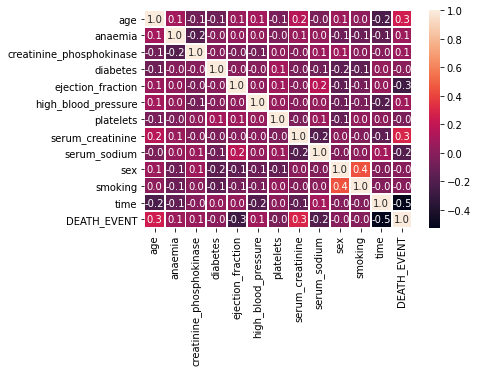

In [ ]:
import seaborn as sn

correlation = df.corr()

matriz_corr = sn.heatmap(correlation, annot = True, fmt='.1f', linewidths=.9)
matriz_corr

## Correlações mais relevantes
Como apresentado acima existe uma fraca correlação entre Mortes e as seguintes variáveis:
* Idade/age
* Fração de ejeção/ejection fraction
* Serum_/creatininie

E uma correção moderada entre time e mortes, porém pelo fato da interpretação da varíavel time não estar "clara", esta não será considerada 

Embora não tenha sido identificado uma correlação entre as comorbidades binárias, é fato que a maior parte dos mortos possuía ao menos uma destas, por conta disto podemos analisar o resultado da seguinte maneira:

* A análise de correlação avalia o crescimento de uma variável em relação a outra
* Esta análise  é mais eficaz quando utilizadas variáveis não binárias, como é o caso dos níveis em que fora identificada a correlação moderada
* Por conta disso, é possível que embora exista relação entre as comorbidades binárias e a taxa de mortes, o modelo matemático utilizado na análise de correlações não é o mais ideal para identifica-las, devido a sua característica de análise de crescimento linear



## Implementação da Rede Bayesiana

In [ ]:
#classe com a tabela de probabilidade 
class ProbabilidadeTabela:
  def __init__(self, name, probabilidade, pais):
    self.name = name #nome do componente
    self.probabilidade = probabilidade #as probabilidades
    self.pais = pais #dependencias

In [ ]:
#componente morte

#probabilidade de morte se baseando nas doencas
valor = []
probDeathEvent0Anaemia0Diabetes0HighBloodPressure0Smoking0 = df.anaemia[(df.DEATH_EVENT == 0) & (df.anaemia == 0) & (df.diabetes == 0) & (df.high_blood_pressure == 0) & (df.smoking == 0)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent0Anaemia0Diabetes0HighBloodPressure0Smoking0)
probDeathEvent0Anaemia0Diabetes0HighBloodPressure0Smoking1 = df.anaemia[(df.DEATH_EVENT == 0) & (df.anaemia == 0) & (df.diabetes == 0) & (df.high_blood_pressure == 0) & (df.smoking == 1)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent0Anaemia0Diabetes0HighBloodPressure0Smoking1)
probDeathEvent0Anaemia0Diabetes0HighBloodPressure1Smoking0 = df.anaemia[(df.DEATH_EVENT == 0) & (df.anaemia == 0) & (df.diabetes == 0) & (df.high_blood_pressure == 1) & (df.smoking == 0)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent0Anaemia0Diabetes0HighBloodPressure1Smoking0)
probDeathEvent0Anaemia0Diabetes0HighBloodPressure1Smoking1 = df.anaemia[(df.DEATH_EVENT == 0) & (df.anaemia == 0) & (df.diabetes == 0) & (df.high_blood_pressure == 1) & (df.smoking == 1)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent0Anaemia0Diabetes0HighBloodPressure1Smoking1)
probDeathEvent0Anaemia0Diabetes1HighBloodPressure0Smoking0 = df.anaemia[(df.DEATH_EVENT == 0) & (df.anaemia == 0) & (df.diabetes == 1) & (df.high_blood_pressure == 0) & (df.smoking == 0)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent0Anaemia0Diabetes1HighBloodPressure0Smoking0)
probDeathEvent0Anaemia0Diabetes1HighBloodPressure0Smoking1 = df.anaemia[(df.DEATH_EVENT == 0) & (df.anaemia == 0) & (df.diabetes == 1) & (df.high_blood_pressure == 0) & (df.smoking == 1)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent0Anaemia0Diabetes1HighBloodPressure0Smoking1)
probDeathEvent0Anaemia0Diabetes1HighBloodPressure1Smoking0 = df.anaemia[(df.DEATH_EVENT == 0) & (df.anaemia == 0) & (df.diabetes == 1) & (df.high_blood_pressure == 1) & (df.smoking == 0)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent0Anaemia0Diabetes1HighBloodPressure1Smoking0)
probDeathEvent0Anaemia0Diabetes1HighBloodPressure1Smoking1 = df.anaemia[(df.DEATH_EVENT == 0) & (df.anaemia == 0) & (df.diabetes == 1) & (df.high_blood_pressure == 1) & (df.smoking == 1)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent0Anaemia0Diabetes1HighBloodPressure1Smoking1)
probDeathEvent0Anaemia1Diabetes0HighBloodPressure0Smoking0 = df.anaemia[(df.DEATH_EVENT == 0) & (df.anaemia == 1) & (df.diabetes == 0) & (df.high_blood_pressure == 0) & (df.smoking == 0)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent0Anaemia1Diabetes0HighBloodPressure0Smoking0)
probDeathEvent0Anaemia1Diabetes0HighBloodPressure0Smoking1 = df.anaemia[(df.DEATH_EVENT == 0) & (df.anaemia == 1) & (df.diabetes == 0) & (df.high_blood_pressure == 0) & (df.smoking == 1)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent0Anaemia1Diabetes0HighBloodPressure0Smoking1)
probDeathEvent0Anaemia1Diabetes0HighBloodPressure1Smoking0 = df.anaemia[(df.DEATH_EVENT == 0) & (df.anaemia == 1) & (df.diabetes == 0) & (df.high_blood_pressure == 1) & (df.smoking == 0)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent0Anaemia1Diabetes0HighBloodPressure1Smoking0)
probDeathEvent0Anaemia1Diabetes0HighBloodPressure1Smoking1 = df.anaemia[(df.DEATH_EVENT == 0) & (df.anaemia == 1) & (df.diabetes == 0) & (df.high_blood_pressure == 1) & (df.smoking == 1)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent0Anaemia1Diabetes0HighBloodPressure1Smoking1)
probDeathEvent0Anaemia1Diabetes1HighBloodPressure0Smoking0 = df.anaemia[(df.DEATH_EVENT == 0) & (df.anaemia == 1) & (df.diabetes == 1) & (df.high_blood_pressure == 0) & (df.smoking == 0)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent0Anaemia1Diabetes1HighBloodPressure0Smoking0)
probDeathEvent0Anaemia1Diabetes1HighBloodPressure0Smoking1 = df.anaemia[(df.DEATH_EVENT == 0) & (df.anaemia == 1) & (df.diabetes == 1) & (df.high_blood_pressure == 0) & (df.smoking == 1)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent0Anaemia1Diabetes1HighBloodPressure0Smoking1)
probDeathEvent0Anaemia1Diabetes1HighBloodPressure1Smoking0 = df.anaemia[(df.DEATH_EVENT == 0) & (df.anaemia == 1) & (df.diabetes == 1) & (df.high_blood_pressure == 1) & (df.smoking == 0)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent0Anaemia1Diabetes1HighBloodPressure1Smoking0)
probDeathEvent0Anaemia1Diabetes1HighBloodPressure1Smoking1 = df.anaemia[(df.DEATH_EVENT == 0) & (df.anaemia == 1) & (df.diabetes == 1) & (df.high_blood_pressure == 1) & (df.smoking == 1)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent0Anaemia1Diabetes1HighBloodPressure1Smoking1)
probDeathEvent1Anaemia0Diabetes0HighBloodPressure0Smoking0 = df.anaemia[(df.DEATH_EVENT == 1) & (df.anaemia == 0) & (df.diabetes == 0) & (df.high_blood_pressure == 0) & (df.smoking == 0)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent1Anaemia0Diabetes0HighBloodPressure0Smoking0)
probDeathEvent1Anaemia0Diabetes0HighBloodPressure0Smoking1 = df.anaemia[(df.DEATH_EVENT == 1) & (df.anaemia == 0) & (df.diabetes == 0) & (df.high_blood_pressure == 0) & (df.smoking == 1)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent1Anaemia0Diabetes0HighBloodPressure0Smoking1)
probDeathEvent1Anaemia0Diabetes0HighBloodPressure1Smoking0 = df.anaemia[(df.DEATH_EVENT == 1) & (df.anaemia == 0) & (df.diabetes == 0) & (df.high_blood_pressure == 1) & (df.smoking == 0)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent1Anaemia0Diabetes0HighBloodPressure1Smoking0)
probDeathEvent1Anaemia0Diabetes0HighBloodPressure1Smoking1 = df.anaemia[(df.DEATH_EVENT == 1) & (df.anaemia == 0) & (df.diabetes == 0) & (df.high_blood_pressure == 1) & (df.smoking == 1)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent1Anaemia0Diabetes0HighBloodPressure1Smoking1)
probDeathEvent1Anaemia0Diabetes1HighBloodPressure0Smoking0 = df.anaemia[(df.DEATH_EVENT == 1) & (df.anaemia == 0) & (df.diabetes == 1) & (df.high_blood_pressure == 0) & (df.smoking == 0)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent1Anaemia0Diabetes1HighBloodPressure0Smoking0)
probDeathEvent1Anaemia0Diabetes1HighBloodPressure0Smoking1 = df.anaemia[(df.DEATH_EVENT == 1) & (df.anaemia == 0) & (df.diabetes == 1) & (df.high_blood_pressure == 0) & (df.smoking == 1)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent1Anaemia0Diabetes1HighBloodPressure0Smoking1)
probDeathEvent1Anaemia0Diabetes1HighBloodPressure1Smoking0 = df.anaemia[(df.DEATH_EVENT == 1) & (df.anaemia == 0) & (df.diabetes == 1) & (df.high_blood_pressure == 1) & (df.smoking == 0)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent1Anaemia0Diabetes1HighBloodPressure1Smoking0)
probDeathEvent1Anaemia0Diabetes1HighBloodPressure1Smoking1 = df.anaemia[(df.DEATH_EVENT == 1) & (df.anaemia == 0) & (df.diabetes == 1) & (df.high_blood_pressure == 1) & (df.smoking == 1)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent1Anaemia0Diabetes1HighBloodPressure1Smoking1)
probDeathEvent1Anaemia1Diabetes0HighBloodPressure0Smoking0 = df.anaemia[(df.DEATH_EVENT == 1) & (df.anaemia == 1) & (df.diabetes == 0) & (df.high_blood_pressure == 0) & (df.smoking == 0)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent1Anaemia1Diabetes0HighBloodPressure0Smoking0)
probDeathEvent1Anaemia1Diabetes0HighBloodPressure0Smoking1 = df.anaemia[(df.DEATH_EVENT == 1) & (df.anaemia == 1) & (df.diabetes == 0) & (df.high_blood_pressure == 0) & (df.smoking == 1)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent1Anaemia1Diabetes0HighBloodPressure0Smoking1)
probDeathEvent1Anaemia1Diabetes0HighBloodPressure1Smoking0 = df.anaemia[(df.DEATH_EVENT == 1) & (df.anaemia == 1) & (df.diabetes == 0) & (df.high_blood_pressure == 1) & (df.smoking == 0)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent1Anaemia1Diabetes0HighBloodPressure1Smoking0)
probDeathEvent1Anaemia1Diabetes0HighBloodPressure1Smoking1 = df.anaemia[(df.DEATH_EVENT == 1) & (df.anaemia == 1) & (df.diabetes == 0) & (df.high_blood_pressure == 1) & (df.smoking == 1)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent1Anaemia1Diabetes0HighBloodPressure1Smoking1)
probDeathEvent1Anaemia1Diabetes1HighBloodPressure0Smoking0 = df.anaemia[(df.DEATH_EVENT == 1) & (df.anaemia == 1) & (df.diabetes == 1) & (df.high_blood_pressure == 0) & (df.smoking == 0)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent1Anaemia1Diabetes1HighBloodPressure0Smoking0)
probDeathEvent1Anaemia1Diabetes1HighBloodPressure0Smoking1 = df.anaemia[(df.DEATH_EVENT == 1) & (df.anaemia == 1) & (df.diabetes == 1) & (df.high_blood_pressure == 0) & (df.smoking == 1)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent1Anaemia1Diabetes1HighBloodPressure0Smoking1)
probDeathEvent1Anaemia1Diabetes1HighBloodPressure1Smoking0 = df.anaemia[(df.DEATH_EVENT == 1) & (df.anaemia == 1) & (df.diabetes == 1) & (df.high_blood_pressure == 1) & (df.smoking == 0)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent1Anaemia1Diabetes1HighBloodPressure1Smoking0)
probDeathEvent1Anaemia1Diabetes1HighBloodPressure1Smoking1 = df.anaemia[(df.DEATH_EVENT == 1) & (df.anaemia == 1) & (df.diabetes == 1) & (df.high_blood_pressure == 1) & (df.smoking == 1)].count()/df.DEATH_EVENT.count()
valor.append(probDeathEvent1Anaemia1Diabetes1HighBloodPressure1Smoking1)

#soma as probabilidades
sum = 0
for x in valor:
  sum = sum + x

#verifica se da 100%
print("Verifica se aproxima de 100%: ", sum)

#nome
name = ["morte"]
probabilidade = ({(False, False, False, False, False): valor[0], 
                  (False, False, False, False, True): valor[1],
                  (False, False, False, True, False): valor[2],
                  (False, False, False, True, True): valor[3],
                  (False, False, True, False, False): valor[4],
                  (False, False, True, False, True): valor[5],
                  (False, False, True, True, False): valor[6],
                  (False, False, True, True, True): valor[7],
                  (False, True, False, False, False): valor[8],
                  (False, True, False, False, True): valor[9],
                  (False, True, False, True, False): valor[10],
                  (False, True, False, True, True): valor[11],
                  (False, True, True, False, False): valor[12],
                  (False, True, True, False, True): valor[13],
                  (False, True, True, True, False): valor[14],
                  (False, True, True, True, True): valor[15],
                  (True, False, False, False, False): valor[16],
                  (True, False, False, False, True): valor[17],
                  (True, False, False, True, False): valor[18],
                  (True, False, False, True, True): valor[19],
                  (True, False, True, False, False): valor[20],
                  (True, False, True, False, True): valor[21],
                  (True, False, True, True, False): valor[22],
                  (True, False, True, True, True): valor[23],
                  (True, True, False, False, False): valor[24],
                  (True, True, False, False, True): valor[25],
                  (True, True, False, True, False): valor[26],
                  (True, True, False, True, True): valor[27],
                  (True, True, True, False, False): valor[28],
                  (True, True, True, False, True): valor[29],
                  (True, True, True, True, False): valor[30],
                  (True, True, True, True, True): valor[31]})

#dependencias
pais = ["anaemia, diabetes, high_blood_pressure, smoking"]

morte = ProbabilidadeTabela(name, probabilidade, pais)


Verifica se aproxima de 100%:  0.9999999999999997


In [ ]:
# Para váriaveis com valores númericos consdierar os valores >= para total e mortes a partir do indice informado

def prob_morte_alternativa(valor,variavel):
  morto  = len(df[(df[variavel] >= valor) & df.DEATH_EVENT == 1])
  total = len(df[df[variavel] >= valor])
  if total == 0:
    total = 1
  prob = morto/total
  if morto == 0:
    prob = 'Valor indisponível'
  return prob 
print(prob_morte_alternativa(95,'age'))


1.0


In [ ]:
  morto  = len(df[(df['creatinine_phosphokinase'] >= 3000) & df.DEATH_EVENT == 1])
  total = len(df[df['creatinine_phosphokinase'] >= 3000])
  print('morto ',morto)
  print('total', total)

morto  4
total 7


## Realização de alguns testes



In [ ]:
#testes

#teste 1
# anemia 
#1 - morte, 2-anemia, 3-dia, 4-pressao
#somente anemia
res = 0
res1 = 0
test = (True, True, True, True, True)
res = res + morte.probabilidade[test]

test = (True, True, True, True, False)
res = res + morte.probabilidade[test]

test = (True, True, True, False, True)
res = res + morte.probabilidade[test]

test = (True, True, False, True, True)
res = res + morte.probabilidade[test]

test = (True, True, False, False, True)
res = res + morte.probabilidade[test]

test = (True, True, True, False, False)
res = res + morte.probabilidade[test]

test = (True, True, False, True,False)
res = res + morte.probabilidade[test]

test = (True, True, False, False, False)
res = res + morte.probabilidade[test]


#Somente pressao
test = (True, True, True, True, True)
res1 = res1 + morte.probabilidade[test]

test = (True, True, True, True, False)
res1 = res1 + morte.probabilidade[test]

test = (True, True, False, True, True)
res1 = res1 + morte.probabilidade[test]

test = (True, False, True, True, True)
res1 = res1 + morte.probabilidade[test]

test = (True, True, False, True, False)
res1 = res1 + morte.probabilidade[test]

test = (True, False, True, True,False)
res1 = res1 + morte.probabilidade[test]

test = (True, False, False, True,True)
res1 = res1 + morte.probabilidade[test]

test = (True, False, False, True, False)
res1 = res1 + morte.probabilidade[test]

res = res*res1

print("Teste 1")
print("Probabilidade da pessoa selecionada morrer e ter anemia e alta pressao arterial: {}% ".format(round(res*100,2)))
print("")

#teste 2
#probabilidade da pessoa selecionada morrer e ter anemia e alta pressao arterial e nao ter tabagismo

#somente anemia
res = 0
res1 = 0
test = (True, True, True, True, True)
res = res + morte.probabilidade[test]

test = (True, True, True, True, False)
res = res + morte.probabilidade[test]

test = (True, True, True, False, True)
res = res + morte.probabilidade[test]

test = (True, True, False, True, True)
res = res + morte.probabilidade[test]

test = (True, True, False, False, True)
res = res + morte.probabilidade[test]

test = (True, True, True, False, False)
res = res + morte.probabilidade[test]

test = (True, True, False, True,False)
res = res + morte.probabilidade[test]

test = (True, True, False, False, False)
res = res + morte.probabilidade[test]

#Somente pressao
test = (True, True, True, True, True)
res1 = res1 + morte.probabilidade[test]

test = (True, True, True, True, False)
res1 = res1 + morte.probabilidade[test]

test = (True, True, False, True, True)
res1 = res1 + morte.probabilidade[test]

test = (True, False, True, True, True)
res1 = res1 + morte.probabilidade[test]

test = (True, True, False, True, False)
res1 = res1 + morte.probabilidade[test]

test = (True, False, True, True,False)
res1 = res1 + morte.probabilidade[test]

test = (True, False, False, True,True)
res1 = res1 + morte.probabilidade[test]

test = (True, False, False, True, False)
res1 = res1 + morte.probabilidade[test]

#sem tabagismo
res1 = 0

test = (True, False, False, False, False)
res1 = res1 + morte.probabilidade[test]

test = (True, False, False, True, False)
res1 = res1 + morte.probabilidade[test]

test = (True, False, True, False, False)
res1 = res1 + morte.probabilidade[test]

test = (True, False, True, True, False)
res1 = res1 + morte.probabilidade[test]

test = (True, True, False, False, False)
res1 = res1 + morte.probabilidade[test]

test = (True, True, False, True, False)
res1 = res1 + morte.probabilidade[test]

test = (True, True, True, False, False)
res1 = res1 + morte.probabilidade[test]

test = (True, True, True, True, False)
res1 = res1 + morte.probabilidade[test]

res = res*res1

res1 = 0

print("Teste 2")
print("Probabilidade da pessoa selecionada morrer e ter anemia e alta pressao arterial e nao ter tabagismo: {}% ".format(round(res*100,2)))
print("")

#teste 3
#probabilidade da pessoa selecionada morrer e nao ter anemia e nem alta pressao arterial
res = 0
res1 = 0

#nao tem anemia
test = (True, False, False, False, False)
res = res + morte.probabilidade[test]

test = (True, False, False, False, True)
res = res + morte.probabilidade[test]

test = (True, False, False, True, False)
res = res + morte.probabilidade[test]

test = (True, False, False, True, True)
res = res + morte.probabilidade[test]

test = (True, False, True, False, False)
res = res + morte.probabilidade[test]

test = (True, False, True, False, True)
res = res + morte.probabilidade[test]

test = (True, False, True, True, False)
res = res + morte.probabilidade[test]

test = (True, False, True, True, True)
res = res + morte.probabilidade[test]

#nao tem alta pressao
test = (True, False, False, False, False)
res1 = res1 + morte.probabilidade[test]

test = (True, False, False, False, True)
res1 = res1 + morte.probabilidade[test]

test = (True, False, True, False, False)
res1 = res1 + morte.probabilidade[test]

test = (True, False, True, False, True)
res1 = res1 + morte.probabilidade[test]

test = (True, True, False, False, False)
res1 = res1 + morte.probabilidade[test]

test = (True, True, False, False, True)
res1 = res1 + morte.probabilidade[test]

test = (True, True, True, False, False)
res1 = res1 + morte.probabilidade[test]

test = (True, True, True, False, True)
res1 = res1 + morte.probabilidade[test]

res = res*res1

print("Teste 3")
print("Probabilidade da pessoa selecionada morrer e nao ter anemia e nem alta pressao arterial: {}% ".format(round(res*100,2)))
print("")

#teste 4
#probabilidade da pessoa selecionada morrer e ter diabetes
res = 0
test = (True, True, True, True, True)
res = res + morte.probabilidade[test]
test = (True, True, True, True, False)
res = res + morte.probabilidade[test]
test = (True, True, True, False, True)
res = res + morte.probabilidade[test]
test = (True, True, True, False, False)
res = res + morte.probabilidade[test]
test = (True, False, True, True, True)
res = res + morte.probabilidade[test]
test = (True, False, True, True, False)
res = res + morte.probabilidade[test]
test = (True, False, True, False, True)
res = res + morte.probabilidade[test]
test = (True, False, True, False, False)
res = res + morte.probabilidade[test]
print("Teste 4")
print("Probabilidade da pessoa selecionada morrer e ter diabetes: {}% ".format(round(res*100,2)))
print("")

#teste 5
#probabilidade da pessoa selecionada morrer e ter anemia e diabetes
res = 0
res1 = 0

#somente anemia
test = (True, True, True, True, True)
res = res + morte.probabilidade[test]

test = (True, True, True, True, False)
res = res + morte.probabilidade[test]

test = (True, True, True, False, True)
res = res + morte.probabilidade[test]

test = (True, True, False, True, True)
res = res + morte.probabilidade[test]

test = (True, True, False, False, True)
res = res + morte.probabilidade[test]

test = (True, True, True, False, False)
res = res + morte.probabilidade[test]

test = (True, True, False, True,False)
res = res + morte.probabilidade[test]

test = (True, True, False, False, False)
res = res + morte.probabilidade[test]

#somente diabete

test = (True, False, True, False, False)
res1 = res1 + morte.probabilidade[test]

test = (True, False, True, False, True)
res1 = res1 + morte.probabilidade[test]

test = (True, False, True, True, False)
res1 = res1 + morte.probabilidade[test]

test = (True, False, True, True, True)
res1 = res1 + morte.probabilidade[test]

test = (True, True, True, False, False)
res1 = res1 + morte.probabilidade[test]

test = (True, True, True, False, True)
res1 = res1 + morte.probabilidade[test]

test = (True, True, True, True, False)
res1 = res1 + morte.probabilidade[test]

test = (True, True, True, True, True)
res1 = res1 + morte.probabilidade[test]

res = res * res1

print("Teste 5")
print("Probabilidade da pessoa selecionada morrer e ter anemia e diabetes: {}% ".format(round(res*100,2)))
print("")

#teste 6
#probabilidade da pessoa selecionada morrer e ter diabetes e alta pressao arterial

res = 0
res1 = 0
#Somente pressao
test = (True, True, True, True, True)
res = res + morte.probabilidade[test]

test = (True, True, True, True, False)
res = res + morte.probabilidade[test]

test = (True, True, False, True, True)
res = res + morte.probabilidade[test]

test = (True, False, True, True, True)
res = res + morte.probabilidade[test]

test = (True, True, False, True, False)
res = res + morte.probabilidade[test]

test = (True, False, True, True,False)
res = res + morte.probabilidade[test]

test = (True, False, False, True,True)
res = res + morte.probabilidade[test]

test = (True, False, False, True, False)
res = res + morte.probabilidade[test]

#somente diabete

test = (True, False, True, False, False)
res1 = res1 + morte.probabilidade[test]

test = (True, False, True, False, True)
res1 = res1 + morte.probabilidade[test]

test = (True, False, True, True, False)
res1 = res1 + morte.probabilidade[test]

test = (True, False, True, True, True)
res1 = res1 + morte.probabilidade[test]

test = (True, True, True, False, False)
res1 = res1 + morte.probabilidade[test]

test = (True, True, True, False, True)
res1 = res1 + morte.probabilidade[test]

test = (True, True, True, True, False)
res1 = res1 + morte.probabilidade[test]

test = (True, True, True, True, True)
res1 = res1 + morte.probabilidade[test]

res = res * res1

print("Teste 6")
print("Probabilidade da pessoa selecionada morrer e ter diabetes e alta pressao arterial: {}% ".format(round(res*100,2)))
print("")

#teste 7
#probabilidade da pessoa selecionada morrer e ter anemia, diabetes e tabagismo mas nao ter alta pressao arterial
#teste 7
#probabilidade da pessoa selecionada morrer e ter 

#anemia, 
res = 0
res1 = 0
test = (True, True, True, True, True)
res = res + morte.probabilidade[test]

test = (True, True, True, True, False)
res = res + morte.probabilidade[test]

test = (True, True, True, False, True)
res = res + morte.probabilidade[test]

test = (True, True, False, True, True)
res = res + morte.probabilidade[test]

test = (True, True, False, False, True)
res = res + morte.probabilidade[test]

test = (True, True, True, False, False)
res = res + morte.probabilidade[test]

test = (True, True, False, True,False)
res = res + morte.probabilidade[test]

test = (True, True, False, False, False)
res = res + morte.probabilidade[test]
#diabetes e 

test = (True, True, True, True, True)
res1 = res1 + morte.probabilidade[test]

test = (True, True, True, True, False)
res1 = res1 + morte.probabilidade[test]

test = (True, True, True, False, True)
res1 = res1 + morte.probabilidade[test]

test = (True, False, True, True, True)
res1 = res1 + morte.probabilidade[test]

test = (True, True, True, False, False)
res1 = res1 + morte.probabilidade[test]

test = (True, False, True, True, False)
res1 = res1 + morte.probabilidade[test]

test = (True, False, True, False,True)
res1 = res1 + morte.probabilidade[test]

test = (True, False, True, False, False)
res1 = res1 + morte.probabilidade[test]

#tabagismo mas 
res2 = 0
test = (True, True, True, True, True)
res2 = res2 + morte.probabilidade[test]

test = (True, True, True, False, True)
res2 = res2 + morte.probabilidade[test]

test = (True, True, False, True, True)
res2 = res2 + morte.probabilidade[test]

test = (True, False, True, True, True)
res2 = res2 + morte.probabilidade[test]

test = (True, True, False, False, True)
res2 = res2 + morte.probabilidade[test]

test = (True, False, True, False, True)
res2 = res2 + morte.probabilidade[test]

test = (True, False, False, True,True)
res2 = res2 + morte.probabilidade[test]

test = (True, False, False, False, True)
res1 = res2 + morte.probabilidade[test]

#nao ter alta pressao arterial
res3 = 0
test = (True, True, True, False, True)
res3 = res3 + morte.probabilidade[test]

test = (True, True, True, False, False)
res3 = res3 + morte.probabilidade[test]

test = (True, True, False, False, True)
res3 = res3 + morte.probabilidade[test]

test = (True, False, True, False, True)
res3 = res3 + morte.probabilidade[test]

test = (True, True, False, False, False)
res3 = res3 + morte.probabilidade[test]

test = (True, False, True, False, False)
res3 = res3 + morte.probabilidade[test]

test = (True, False, False, False,True)
res3 = res3 + morte.probabilidade[test]

test = (True, False, False, False, False)
res3 = res3 + morte.probabilidade[test]

res = res*res1*res2*res3
print("Teste 7")
print("Probabilidade da pessoa selecionada morrer e ter anemia, diabetes e tabagismo mas nao ter alta pressao arterial: {}% ".format(round(res*100,2)))
print("")

#Teste 8 probabilidade da pessoa com anemia morrer
res = 0
test = (True, True, True, True, True)
res = res + morte.probabilidade[test]

test = (True, True, True, True, False)
res = res + morte.probabilidade[test]

test = (True, True, True, False, True)
res = res + morte.probabilidade[test]

test = (True, True, True, False, False)
res = res + morte.probabilidade[test]

test = (True, True, False, True, True)
res = res + morte.probabilidade[test]

test = (True, True, False, True, False)
res = res + morte.probabilidade[test]

test = (True, True, False, False, True)
res = res + morte.probabilidade[test]

test = (True, True, False, False, False)
res = res + morte.probabilidade[test]

print("Teste 9")
print('Probabilidade da pessoa selecionada morrer caso tenha anemia: {}%'.format(round(res*100,2)))
print ("")

print("Teste 10")
res = prob_morte_alternativa(3,'serum_creatinine')
print("Probabilidade da pessoa selecionada morrer caso tenha  a serum_creatinine >= 3: {}% ".format(round(res*100,2)))
print("")

print("Teste 11")
res = prob_morte_alternativa(20,'ejection_fraction')
print("Probabilidade da pessoa selecionada morrer caso tenha uma fração de ejeção >= 20: {}% ".format(round(res*100,2)))
print("")



print("Teste 12")
res = prob_morte_alternativa(70,'age')
print("Probabilidade da pessoa selecionada morrer caso tenha uma idade >= 70: {}% ".format(round(res*100,2)))
print("")



Teste 1
Probabilidade da pessoa selecionada morrer e ter anemia e alta pressao arteral: 2.01% 

Teste 2
Probabilidade da pessoa selecionada morrer e ter anemia e alta pressao arteral e nao ter tabagismo: 3.4% 

Teste 3
Probabilidade da pessoa selecionada morrer e nao ter anemia e nem alta pressao arteral: 3.19% 

Teste 4
Probabilidade da pessoa selecionada morrer e ter diabetes: 13.38% 

Teste 5
Probabilidade da pessoa selecionada morrer e ter anemia e diabetes: 2.06% 

Teste 6
Probabilidade da pessoa selecionada morrer e ter diabetes e alta pressao arteral: 1.74% 

Teste 7
Probabilidade da pessoa selecionada morrer e ter anemia, diabetes e tabagismo mas nao ter alta pressao arteral: 0.02% 

Teste 9
Probabilidade da pessoa selecionada morrer caso tenha anemia: 15.38%

Teste 10
Probabilidade da pessoa selecionada morrer caso tenha  a serum_creatinine >= 3: 62.5% 

Teste 11
Probabilidade da pessoa selecionada morrer caso tenha uma fração de ejeção >= 20: 31.29% 

Teste 12
Probabilidade d

## Implementação

Levando em consideração a análise de dados e a análise exploratória para a resolução do problema e do nosso modelo:

* Espaço: O(N) - N seria a quantidade de dados na tabela csv
* Tempo: O(N) - N seria a quantidade de dados na tabela csv

Percebemos que o espaço e o tempo tem complexidade de O(N), isso acontece porque o maior tempo gasto e a maior quantidade de armazenamentos que fazemos depende da quantidade de dados que temos na tabela csv.

Em questão da performance, gerar gráficos ou a resolução do modelo não gasta tantos recursos e tempo como a tabela csv.

## Outras soluções

Além do exemplo apresentado pelo professor Cedric sobre a rede bayesiana, utilizamos outra solução https://www.edureka.co/blog/bayesian-networks/ como base para o nosso entendimento sobre rede bayesiana e para a construção do nosso modelo.

Nessa solução, o autor mostra e explica todo tipo de conteúdo que pode se envolver no contexto de redes bayesiana como a explicação do grafo, como deve ser, como é construido as tabelas e suas probabilidades e também mostra até exemplo de implementação e como ficaria o grafo.

# Análise da Solução

A solução apresentada é extremamente simplificada quando considerados dados reais devido a simplicidade da base de dados que considera poucas variáveis do mundo, as quais foram identificadas correlações relevantes somente entre elas e o evento de morte.

Apesar da simplicidade da base de dados, e, para aplicações no mundo real não ser o modelo mais ideal, por considerar poucas variáveis, a solução demonstrou resultados bem interessantes, principalmente nas variáveis de creatinina sérica, e fração de ejeção, tendo probabilidades que evoluem linearmente (positiva ou negativamente), auxiliando na tentativa de prever as chances de sobrevivência de um dado paciente a partir de tais informações